<a href="https://colab.research.google.com/github/helgadenes/Astrophysics_yachay/blob/main/Example-Code/spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualising spectral data, fitting spectral lines: Coordinates of gam Cas – Visual Profile – Viewing images – gamCas Spectrum – MultiSpectrum Display


Based on: https://stellartrip.net/python-for-astronomy-and-spectroscopy-rapid-spectrum-analysis/?lang=en

## Profile of gamma Cassiopeiae

To get started, it may be interesting to look for information about our target, especially its position. One of the most widely used libraries dedicated to astronomy is Astropy. This library, beyond the basic use which is made here, includes many very advanced internal modules. It is an open source project with many regular contributions which started in 2011 and is widely used in the professional world.


In [35]:
#!pip install astropy
#!pip install astroquery
#!pip install ipyaladin
#!pip install specutils

In [12]:
# the .csv files with the data are in a google drive folder. We are mounting the google drive here:
from google.colab import drive
drive.mount('/content/drive')

directory = '/content/drive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Coordinates

1- Retrieving the coordinates of the star gam Cas

1.1 - Using Astropy - Coordinates

import of the Astropy library's coordinates management module

A SkyCoords object represents an ICRS position (Right ascension [RA], Declination [Dec]) in the sky.

It is thus possible to retrieve the position of our target, by calling the from_name method which takes the name of the object as a parameter, then we display its value .


In [13]:
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np


gam_cas_coords = SkyCoord.from_name("HD5394")
print(f"Objet SkyCoords : {gam_cas_coords}")

Objet SkyCoords : <SkyCoord (ICRS): (ra, dec) in deg
    (14.17721289, 60.71674002)>


From this variable, which is a SkyCoord object, it is possible to access the separate values for right ascent and declination. Depending on the methods used, different data formats and fineness are accessible.

In [14]:
print(f" - Position RA/DEC (hms & dms / ep=J2000): {gam_cas_coords.to_string('hmsdms')}")
print(f" - Position RA et DEC - Détail (ep=J2000) : {gam_cas_coords.ra.hms, gam_cas_coords.dec.dms}")
print(f" - RA (min) : {gam_cas_coords.ra.hms.m}")

 - Position RA/DEC (hms & dms / ep=J2000): 00h56m42.5310945s +60d43m00.26408899s
 - Position RA et DEC - Détail (ep=J2000) : (hms_tuple(h=0.0, m=56.0, s=42.53109450000025), dms_tuple(d=60.0, m=43.0, s=0.2640889920127165))
 - RA (min) : 56.0


We can also create a SkyCoord object from the known coordinates and their format.



In [15]:
from astropy import units as u
c = SkyCoord(14.184, 60.7249, frame='icrs', unit='deg')
c = SkyCoord('00h56m44.16s', '+60d43m29.64s', frame='icrs')
c = SkyCoord('00 56 44.16 +60 43 29.64', unit=(u.hourangle, u.deg))
c 

<SkyCoord (ICRS): (ra, dec) in deg
    (14.184, 60.7249)>

In addition, it is also possible to query the various catalogues with the Astroquery library, as in the example below with a query to SIMBAD8, whether it is an object in the sky or an entire region. The list of catalogue modules is available here : https://astroquery.readthedocs.io/en/latest/

In addition, adding the “sptype” field to the VOTable query also allows you to retrieve the spectral type of the star. 

Using Astroquery and the SIMBAD module to retrieve the coordinates and spectral type of gam Cas


In [16]:
#import module
from astroquery.simbad import Simbad

#get a simbad instance
simbad = Simbad()

#add spectral type parameters for VOTable request
simbad.add_votable_fields('sptype')

#request
result_table = simbad.query_object("gam cas")
result_table.pprint(show_unit=True)

#Coordinates
print("\nCoordinates")
print(result_table['RA'][0])
print(result_table['DEC'][0])

#Spectral Type
print("\nSpectral Type")
print(result_table['SP_TYPE'])

 MAIN_ID        RA           DEC      ...      SP_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                                     
--------- ------------- ------------- ... ------------------- ----------------
* gam Cas 00 56 42.5310 +60 43 00.264 ... 2011ARep...55...31S                1

Coordinates
00 56 42.5310
+60 43 00.264

Spectral Type
SP_TYPE 
--------
B0.5IVpe


## Visual Profile – View your images

After retrieving the coordinates of our target, we can display an image taken during a previous astrophotography session, still with the Astropy library, but also Matplotlib


Source files and visualization of observation data

2 - Manipulating FITS files with Astropy

2.1 - FITS header and metadata

In [17]:
from astropy.io import fits

In [18]:
#open image
image_path = '{}/dataset/gamcas_siril_astrometry.fit'.format(directory)
hdu_list = fits.open(image_path)
hdu_list.info()

Filename: /content/drive/My Drive/Colab Notebooks//dataset/gamcas_siril_astrometry.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   (5496, 3672)   float32   


In [19]:
#get image_data, header and print header
hdu = hdu_list[0]
image_data = hdu_list[0].data
image_header = hdu_list[0].header

print(f'Image Data Type : {type(image_data)} - Shape : {image_data.shape}\n')
print('------------------------------ Header ------------------------------')
print(repr(image_header))
print('---------------------------- End Header ----------------------------')

Image Data Type : <class 'numpy.ndarray'> - Shape : (3672, 5496)

------------------------------ Header ------------------------------
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 5496 / length of data axis 1                          
NAXIS2  =                 3672 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MIPS-FHI=                   1. / Upper visualization cutoff                     
MIPS-FLO=                   0. / Lower visualization cutoff                     
BZERO   =                   0. / offset data range to t

This block of metadata, the header, as well as the second block containing the matrix of the image itself will allow us to visualise the image by varying several parameters if necessary.

2.2 - Viewing the image with MatplotLib
With different types of visualization according to the parameters when calling the imshow() method

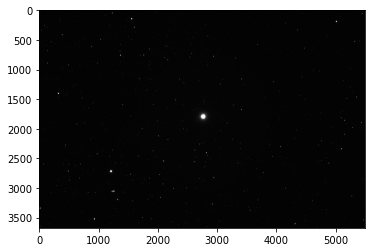

In [20]:
#Init figure
f1 = plt.figure()
f1.add_subplot()

#Show raw image - Parameters dataset-image & colorMap
plt.imshow(image_data, cmap='gray')
plt.show()

Characteristics of the image

To display information about the shooting characteristics, the numpy library can be associated with the numpy library. This allows the statistical values (min, max, avg, standard deviation) to be displayed in addition to the histogram of the image.

In [21]:
print('----- Statistics values -----')
print('Min :', np.min(image_data))
print('Max :', np.max(image_data))
print('Mean :', np.mean(image_data))
print('Stdev :', np.std(image_data))
print('Data Type :', image_data.dtype) #i.e. <f4 = little-endian single-precision floating point 32 bit 
#(More detail about stype at https://numpy.org/doc/stable/reference/arrays.dtypes.html)
print('Image length : ', len(image_data)) # size list
print('Shape :', image_data.shape) # dimensions of the array

----- Statistics values -----
Min : 0.0
Max : 1.0
Mean : 0.0162365
Stdev : 0.023749666
Data Type : >f4
Image length :  3672
Shape : (3672, 5496)


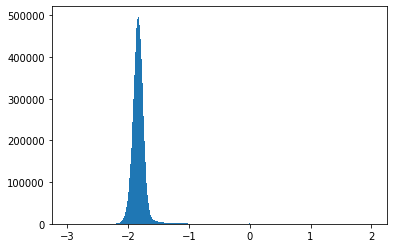

In [22]:
np.seterr(divide='ignore') #suppress the warnings raised by taking log10 of data with zeros

#New figure
f2 = plt.figure()

#Prepare Histogram
#Because image is a 2D Tab, need to convert in 1-D for plotting
#Use flatten () method on an array return 1-D numpy tab.
plt.hist(np.log10(image_data.flatten()), range=(-3, 2), bins=1000);

#Show Histogram
plt.show()


We will thus be able to modify the display of our image according to the areas of the histogram that interest us most (i.e. -0.2 / 0.2), because their visualization is facilitated.

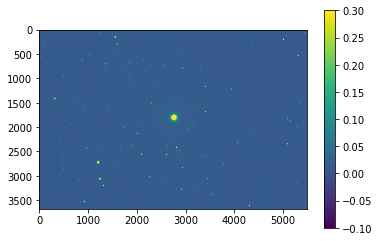

In [23]:
f3 = plt.figure()
img = plt.imshow(image_data)
img.set_clim(-0.1,0.3)
plt.colorbar()

But also use different types of colouring (cmap) and a logarithmic scale with numpy ( np.log(dataset-image) ).



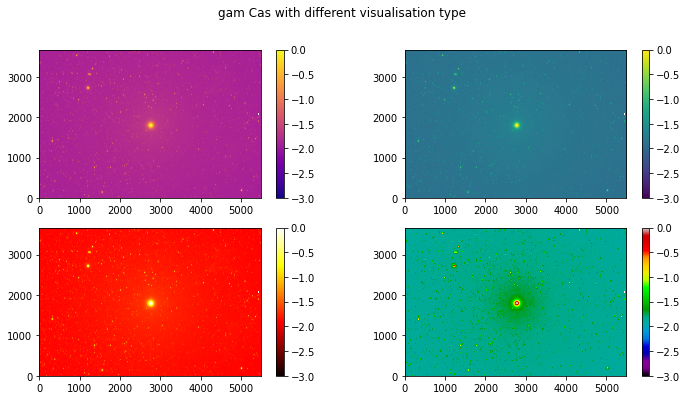

In [24]:
from matplotlib.colors import LogNorm

f4 = plt.figure(figsize=(12,6))
f4.suptitle('gam Cas with different visualisation type')

f4.add_subplot(2,2, 1)
plt.imshow(np.log10(image_data), cmap='plasma', vmin=-3, vmax=0, origin='lower')
plt.colorbar()

f4.add_subplot(2,2, 2)
plt.imshow(np.log10(image_data), cmap='viridis', vmin=-3, vmax=0, origin='lower')
plt.colorbar()

f4.add_subplot(2,2,3)
plt.imshow(np.log10(image_data), cmap='hot', vmin=-3, vmax=0, origin='lower')
plt.colorbar()

f4.add_subplot(2,2, 4)
plt.imshow(np.log10(image_data), cmap='nipy_spectral',  vmin=-3, vmax=0, origin='lower')
plt.colorbar()

plt.show(block=True)


Celestial positioning – Astrometry on the acquired image

When processing the image, an astrometric resolution was made and the result was added to the header of the fit image. It is possible to project these coordinates on our display ((ax = plt.subplot(projection=wcs_for_plot)) with Matplotlib after instantiation of a WCS object of the module of the same name from Astropy. It is also possible to draw the contours of the objects, according to the different levels detected in the matrix.

3.1 - Displaying a coordinate layer via the Header


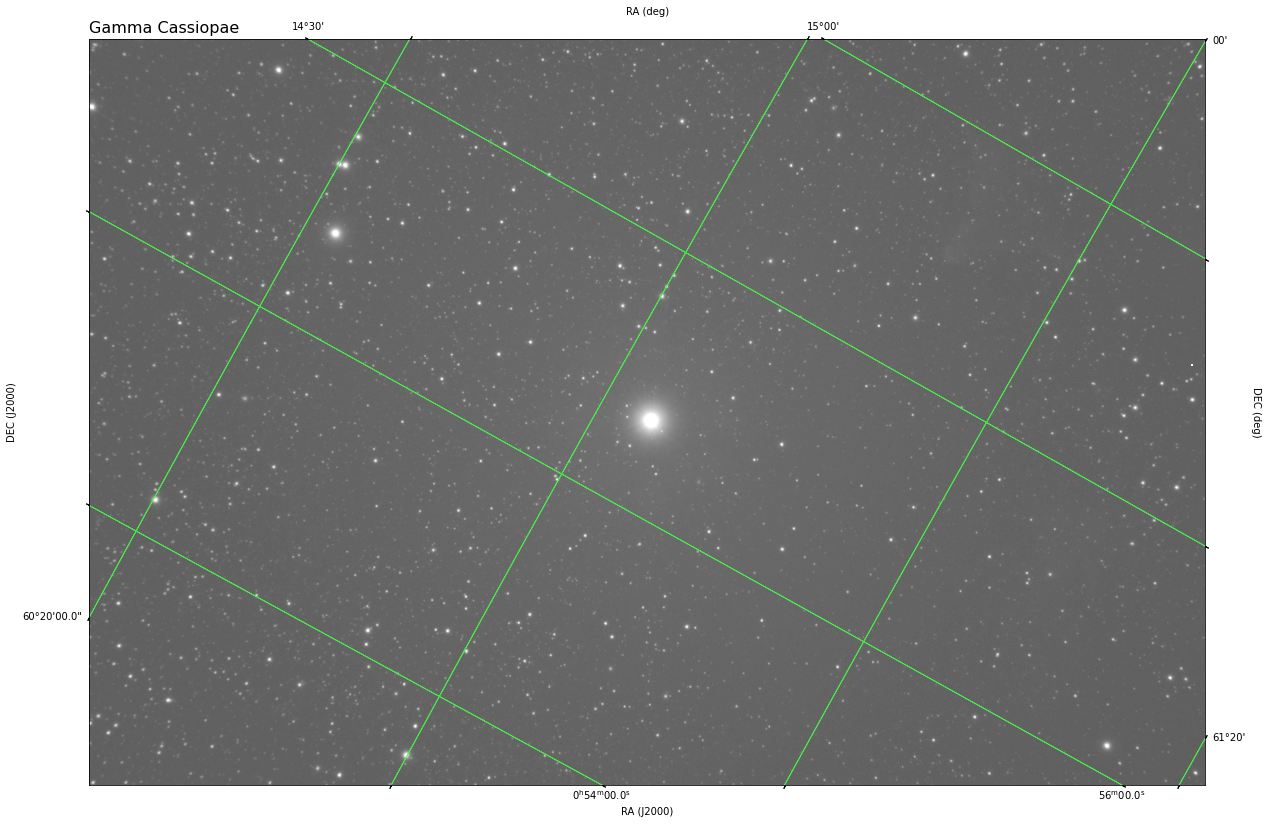

In [25]:
%matplotlib inline
from astropy.wcs import WCS
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)#delete after also
#warnings.filterwarnings("ignore", category=Warning)#delete after also

#Create WCS object
wcs_for_plot = WCS(image_header)

#prepare plot
fig5 = plt.figure(figsize=(20, 20))
ax = plt.subplot(projection=wcs_for_plot) #add wcs informations on plot
plt.imshow(image_data, origin='lower', cmap='gray', aspect='equal',norm=LogNorm())
plot_title = "Gamma Cassiopae "
plt.title(plot_title ,fontsize=16, loc='left')

#add and configure axis informations
ax = plt.gca()
ax.grid(True, color='white', ls='solid')
ra = ax.coords[0]
dec = ax.coords[1]

ra.set_axislabel('RA (J2000)',  minpad=1)
dec.set_axislabel('DEC (J2000)',  minpad=1)
ra.set_major_formatter('hh:mm:ss.s')
dec.set_major_formatter('dd:mm:ss.s')

#add other grid as overlay
overlay = ax.get_coords_overlay('icrs') # or galactic, alt-az, ...
overlay.grid(True, color='lime', ls='solid')
overlay[0].set_axislabel('RA (deg)')
overlay[1].set_axislabel('DEC (deg)')

#uncomment the line after for show contour on objects
#ax.contour(image_data, transform=ax.get_transform(wcs_for_plot), levels=np.logspace(-3, 0, 3), colors='orange', alpha=1)

#show
plt.show()


Creating a jpeg image  

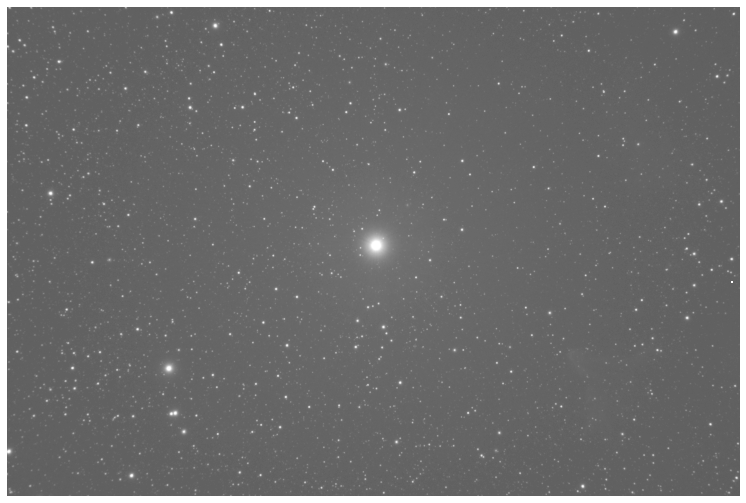

In [26]:
#image name (FITS) to convert : image_path
#image name convert in jpeg/png : gamcas_jpeg.jpeg
from matplotlib.colors import LogNorm
%matplotlib inline
fig6 = plt.figure(figsize=(16, 9))
plt.imshow(image_data, cmap='gray', norm=LogNorm())
plt.grid()
plt.axis('off')
plt.savefig("{}/dataset/gamcas_jpeg.jpeg".format(directory), bbox_inches='tight')

## Spectroscopy

After visiting the Astropy library to display information from our images, we can use it, via its SpecUtils module, to display spectra made with an Alpy600.

Note that the reduction part of the 2D to 1D spectrum is not mentioned here. It is considered that this processing is carried out with standard software. (i.e. ISIS, Demetra, VSpec, SpcAudace, etc.).

4 - Display and manipulation of spectra processed with SpecUtils

4.1 - Visualisation of the 2D Spectrum

From the elements used previously, it is therefore possible to display the acquired raw spectrum and check that it is not saturated.

Filename: /content/drive/My Drive/Colab Notebooks//dataset/Navi_Light_007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   (2749, 2199)   int16 (rescales to uint16)   
Image Data Type : <class 'numpy.ndarray'> - Shape : (2199, 2749)
------------------------------ Header ------------------------------
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2749                                                  
NAXIS2  =                 2199                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ROWORDER= 'TOP-DOWN'           / Row Order                             

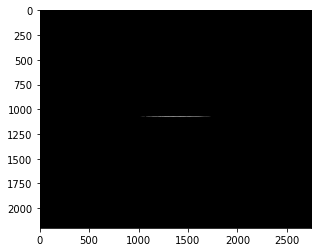

In [27]:
#open image and show file info
spec2D_path = '{}/dataset/Navi_Light_007.fits'.format(directory)
hdu_list_spec2D = fits.open(spec2D_path)
hdu_list_spec2D.info()

spec2D_data = hdu_list_spec2D[0].data
spec2D_header = hdu_list_spec2D[0].header

print(f'Image Data Type : {type(spec2D_data)} - Shape : {spec2D_data.shape}')
print('------------------------------ Header ------------------------------')
print(repr(spec2D_header))
print('---------------------------- End Header ----------------------------')

fig9 = plt.figure()
plt.imshow(spec2D_data, cmap='gray',norm=LogNorm(), vmin=1800,vmax = 4500)
plt.grid(False)

print('Statistics values')
print('Min:', np.min(spec2D_data))
print('Max:', np.max(spec2D_data))
print('Mean:', np.mean(spec2D_data))
print('Stdev:', np.std(spec2D_data))

It is of course possible to display our reduced spectrum using only the Matplotlib library, by exposing the values on a classical graph, you will find an example here on the Matplotlib documentation : https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/spectrum_demo.html.

SpecUtils

However, for the past 4 years, there has been a library specially dedicated to spectroscopy in Astropy. This library is called SpecUtils15, here is its general description as posted on the documentation :

specutils is a Python package for representing, loading, manipulating, and analyzing astronomical spectroscopic data. 

source : https://specutils.readthedocs.io/en/stable/

Thus, a number of manipulation and analysis tools are already included in the package, avoiding the need to code all these parts ourselves. The example below starts from a classical spectrum of our target to display the spectrum and make a quick analysis of the Halpha line.

4.2 - 1D Spectrum Visualisation with SpecUtils and Matplotlib¶


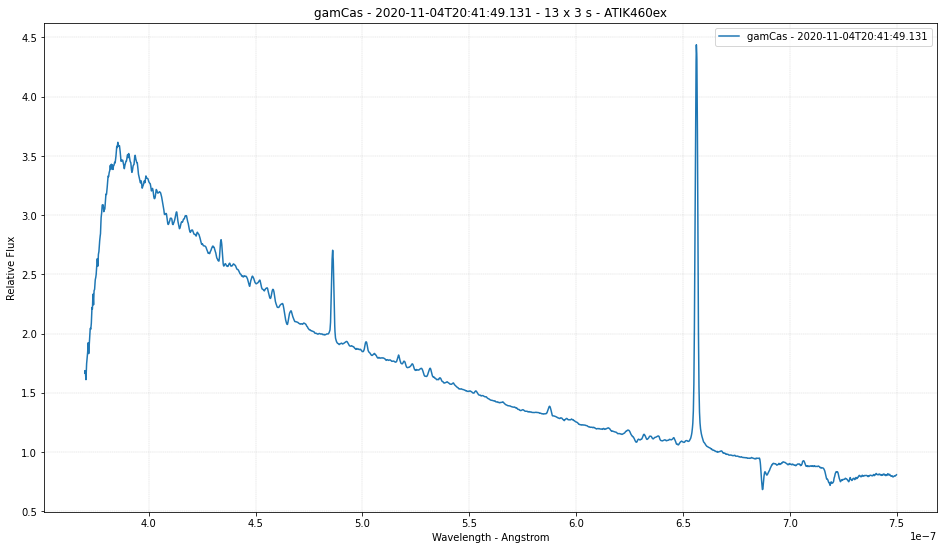

In [28]:
#Show a unique spectrum 

#imports
import astropy.wcs as fitswcs #wcs
from specutils import Spectrum1D, SpectralRegion #spectrum1D (specutils)

spec_path = "{}/dataset/GamCas_20201104T204413.fit".format(directory)

#open & load spectrum file
file = fits.open(spec_path)  
specdata = file[0].data
header = file[0].header

#make WCS object
wcs_data = fitswcs.WCS(header={'CDELT1': header['CDELT1'], 'CRVAL1': header['CRVAL1'],
                               'CUNIT1': header['CUNIT1'], 'CTYPE1': 'WAVE',
                               'CRPIX1': header['CRPIX1']})

#set flux units
flux= specdata * u.Jy

#create a Spectrum1D object with specutils
spec = Spectrum1D(flux=flux, wcs=wcs_data)

#plot spectrum
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(spec.spectral_axis * u.AA, spec.flux)

#X axis label
ax.set_xlabel(header['CTYPE1'] + ' - ' + header['CUNIT1'])

#Y axis label
ax.set_ylabel('Relative Flux')

#Grid configuration
ax.grid(color='grey', alpha=0.8, linestyle='-.', linewidth=0.2, axis='both') 
    
#legend configuraiton
legend_value = header['OBJNAME'] + ' - ' + header['DATE-OBS']
ax.legend([legend_value], loc=('best'))

#prepare and set plot title with header infos 
spectrumTitle = header['OBJNAME'] + ' - ' + header['DATE-OBS'] + ' - '+ header['EXPTIME2']+ ' - ' + str(header['DETNAM'])
ax.set_title(spectrumTitle, loc='center', fontsize=12, fontweight=0.5)

#Show Plot
plt.show()

After this visualization, the tools present in the library make it possible to manipulate the spectrum and to analyze it.

4.3 - Spectrum normalization by its continuum

Continuum display


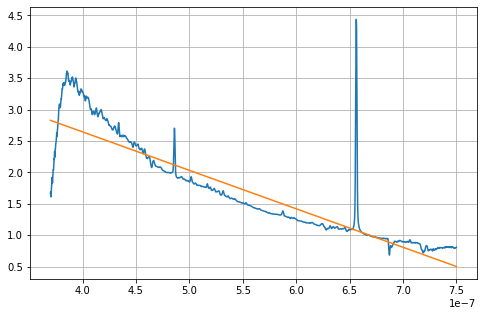

In [30]:
#Visualize continuum fitting

#imports
from astropy.modeling import models, fitting
from specutils.fitting import fit_continuum
from scipy.optimize import curve_fit as cv 

#prepare data
x = spec.spectral_axis
y = spec.flux

#fitting continuum (with exclude region between 3700A and 4000A)
g1_fit = fit_continuum(spec, exclude_regions=[SpectralRegion(3000 * u.AA, 4000 * u.AA)])
y_continuum_fitted = g1_fit(x)

#make plot
fig10, ax10 = plt.subplots(figsize=(8,5))
#spectrum
ax10.plot(x, y)
#continuum
ax10.plot(x, y_continuum_fitted)
ax10.grid(True)
plt.show()

Division by the continuum



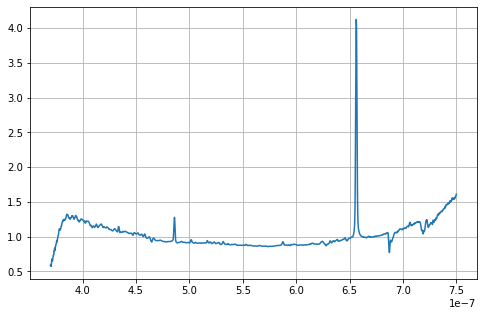

In [32]:
# Normalization

#prepare data
x_2 = spec.spectral_axis
y_2 = spec.flux

#fitting continuum (with exclude region 3700/4000 & H lines emission)
g_fit = fit_continuum(spec, exclude_regions=[SpectralRegion(3500 * u.AA, 4000 * u.AA), SpectralRegion(4825 * u.AA, 4885 * u.AA), SpectralRegion(6520 * u.AA, 6540 * u.AA)])

#divide spectrum by his continuum
y_cont_fitted = g_fit(x_2)
spec_normalized = spec / y_cont_fitted

#show on plot
fig11, ax11 = plt.subplots(figsize=(8,5))
ax11.plot(spec_normalized.spectral_axis, spec_normalized.flux)
ax11.grid(True)
plt.show()

4.4 - Emission line detection

Once the spectrum has been normalised, it is possible to use the find_lines_derivative method to detect emission or absorption lines in the spectrum. There are two methods for this step, by calculating the derivative and then thresholding the flux (as below), or by thresholding the flux according to a factor applied to the spectral uncertainty. More information on these methods here : https://specutils.readthedocs.io/en/stable/fitting.html

In [ ]:
#imports
from specutils.fitting import find_lines_derivative
from specutils.fitting import fit_lines

#Line fitting with Derivative technique
lines = find_lines_derivative(spec_normalized, flux_threshold=1.2)
print('emission: ', lines[lines['line_type'] == 'emission']) 

emission:       line_center       line_type line_center_index
          m                                       
---------------------- --------- -----------------
3.8091308837367406e-07  emission               178
3.8189368626580833e-07  emission               194
3.8244527258013386e-07  emission               203
 3.828742841579426e-07  emission               210
 3.839774567865937e-07  emission               228
  3.84958054678728e-07  emission               244
 3.854483536247951e-07  emission               252
3.8618380204389585e-07  emission               264
 3.872869746725469e-07  emission               282
3.8771598625035565e-07  emission               289
                   ...       ...               ...
 7.418956874156092e-07  emission              6068
 7.425698484664515e-07  emission              6079
 7.432440095172938e-07  emission              6090
 7.438568831998777e-07  emission              6100
 7.443471821459449e-07  emission              6108
 7.452052053015624e-

4.5 - Selection of a spectral region and display of line analysis values
From the detection of lines in previous emissions, the selection of an associated spectral region allows to focus on one of them, Halpha for example, and to use existing analysis tools to retrieve the values (i.e. centroid, fhwm, snr, estimation of parameters of a Gaussian model, etc.). More information on these analysis tools here : https://specutils.readthedocs.io/en/stable/fitting.html#parameter-estimation

center :  6.563084786455737e-07 m
fwhm :  1.765796195394558e-09 m


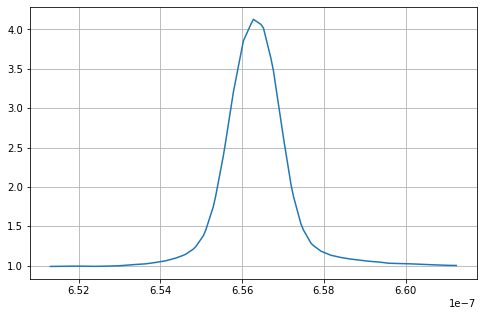

In [33]:
#import analysis tools
from specutils.manipulation import extract_region
from specutils.fitting import estimate_line_parameters
from specutils.analysis import centroid, fwhm

#create spectral region (after line detection of 6562.77A) +/- 50A
sr =  SpectralRegion((6563-50)*u.AA, (6563+50)*u.AA)

#print centroid - need a spectrum and a spectral region in parameters
center = centroid(spec_normalized, sr)  
print("center : ", center)

#print fwhm - need a spectrum and a spectral region in parameters
fwhm_spec = fwhm(spec_normalized, regions=sr)
print("fwhm : ", fwhm_spec)

#create a new spectrum of the selected region for plot
sub_spectrum = extract_region(spec_normalized, sr)
Ha_line = Spectrum1D(flux=sub_spectrum.flux,spectral_axis=sub_spectrum.spectral_axis)

#plot
fig12, ax12 = plt.subplots(figsize=(8,5))
ax12.plot(Ha_line.spectral_axis, Ha_line.flux)
ax12.grid(True)
plt.show()

## Comparison of spectra

When several spectra are acquired over time on the same target, it is interesting to visualise them on the same graph to be able to compare them. Portions of previous codes can thus be reused. For the example below, I doubled the two files of spectra of gam Cas done the same evening to make it more visible.

4.6 - Multi-spectrum visualisation

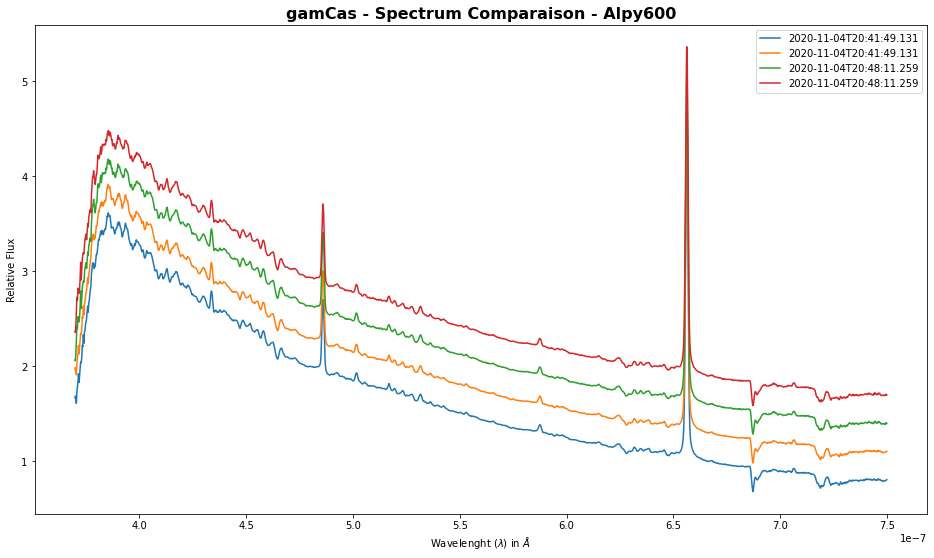

In [34]:
#imports if needed
from astropy.io import fits
import astropy.units as u
import astropy.wcs as fitswcs
from specutils import Spectrum1D
import matplotlib.pyplot as plt

#list of path files
spec_list = ["{}/dataset/GamCas_20201104T204413.fit".format(directory),
            "{}/dataset/GamCas_20201104T204413-2.fit".format(directory),
            "{}/dataset/GamCas_20201104T204937.fit".format(directory),
            "{}/dataset/GamCas_20201104T204937-2.fit".format(directory)] 

#list of spectrum1D
spec1D_list = []

#modify offset for change visualization preferences
offset = 0.3

#parse and create plot for each spectrum in progress
for sip in spec_list :
    sip_file = fits.open(sip)
    sip_data = sip_file[0].data
    sip_header = sip_file[0].header

    #create WCS object for each spectrum in progress
    sip_wcs = fitswcs.WCS(header={'CDELT1': sip_header['CDELT1'], 'CRVAL1': sip_header['CRVAL1'],
                                   'CUNIT1': sip_header['CUNIT1'], 'CTYPE1': 'WAVE',
                                   'CRPIX1': sip_header['CRPIX1']})
    
    #apply offset on flux and create spec1D
    sip_flux = (sip_data + (offset * (spec_list.index(sip)))) * u.Jy
    sip_spec1D = Spectrum1D(flux=sip_flux, wcs=sip_wcs)
    
    #add spec1D to spec1DList
    spec1D_list.append((sip_spec1D, sip_header))
        
        
#create a fig
fig = plt.subplots(figsize=(16, 9))

#create a line plot for each spec1D in the list
for spec1Dip in spec1D_list:
    plt.plot(spec1Dip[0].spectral_axis, spec1Dip[0].flux, label=spec1Dip[1]["DATE-OBS"])
    
#Plot configuration 
plt.legend(loc='upper right')
plt.xlabel("Wavelenght ($\lambda$) in $\AA$ ")
plt.ylabel("Relative Flux")
plt.title("gamCas - Spectrum Comparaison - Alpy600", fontsize=16, fontweight='bold')
plt.show()
